<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [18]:
import matplotlib.pyplot as plt
import numpy as np

## 11.2 How and what do machines learn?
### 11.2.2 A First Learning Algorithm: Instance-based Learning
#### Example 11.1: Instance-based Learning of Stress-Strain Data

Define the dataset:

In [19]:
strain = np.array([0.0001, 0.0004, 0.0009, 0.0012, 0.0015, 0.0016, 0.0021, 0.0028, 0.0033, 0.0040, 0.0048, 0.0050, 0.0058, 0.0064, 0.0070, 0.0077, 0.0085, 0.0089, 0.0094, 0.0102,])
stress = np.array([ 0.84, 10.93, 20.24, 34.73, 43.78, 42.75, 43.42, 46.16, 50.41, 46.36, 50.37, 49.51, 49.88, 43.97, 48.08, 52.05, 51.36, 52.63, 53.18, 50.61,])

... and plot everything:

[Text(0.5, 0, 'strain [-]'),
 Text(0, 0.5, 'stress [MPa]'),
 (-2e-05, 0.011),
 (-0.1, 62.0)]

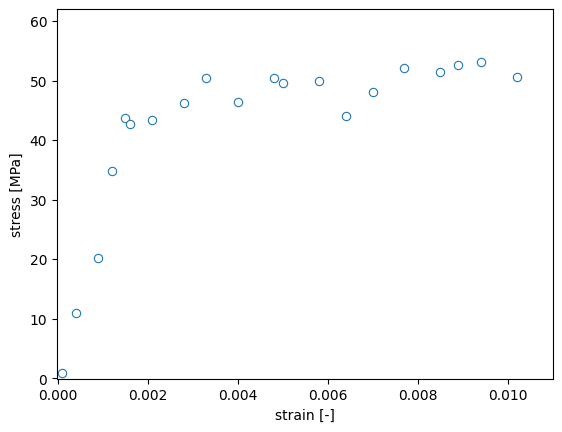

In [20]:
fig, ax = plt.subplots()
ax.plot(strain, stress, mfc='1', marker='o', mew=0.8, c='C0', lw=0, ms=6)
ax.set(xlabel='strain [-]', ylabel='stress [MPa]', xlim=(-0.00002, 0.011), ylim=(-0.1, 62))


Make a predictions for a new input value giben by the strain value $\varepsilon = 0.0042$. 

Find the nearest input value in the training dataset by checking the distance to all strain values and picking the point for which the distance is smallest:

In [21]:
new_strain_value = 0.0042
delta_eps = np.abs(strain - new_strain_value)

idx = np.argmin(delta_eps)

print(f"The point with index {idx} with the value epsilon={strain[idx]} is the closest.")

predicted_stress = stress[idx]
print(f"It has the predicted stress value of {predicted_stress}.")

The point with index 9 with the value epsilon=0.004 is the closest.
It has the predicted stress value of 46.36.


Let's plot all of this into a figure. There we can see, that we indeed picked the stress value of the data point that is -- horizontally -- the nearest.

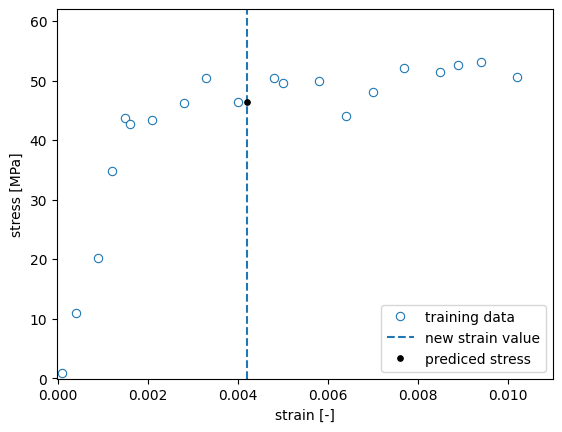

In [22]:
fig, ax = plt.subplots()
ax.plot(strain, stress, mfc='1', marker='o', mew=0.8, c='C0', lw=0, ms=6, label='training data')
ax.axvline(new_strain_value, label='new strain value', linestyle='--')
ax.plot(new_strain_value, predicted_stress, mfc='k', marker='o', mew=0.8, c='k', lw=0, ms=4, label='prediced stress')
ax.set(xlabel='strain [-]', ylabel='stress [MPa]', xlim=(-0.00002, 0.011), ylim=(-0.1, 62))
ax.legend();